In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Advertising.csv')

In [3]:
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape


(200, 5)

In [5]:
df.columns.values.tolist()


['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()


Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


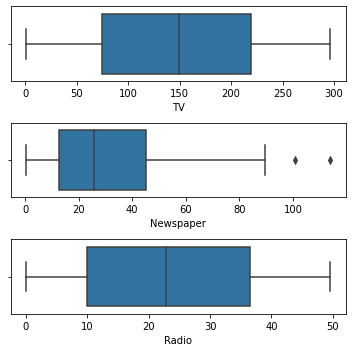

In [59]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

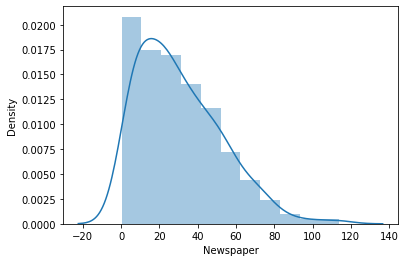

In [60]:
sns.distplot(df['Newspaper'])

In [12]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [13]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [14]:
data = df.copy()

In [15]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

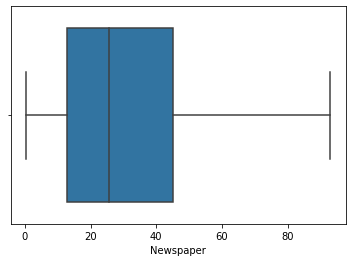

In [61]:
sns.boxplot(data['Newspaper'])

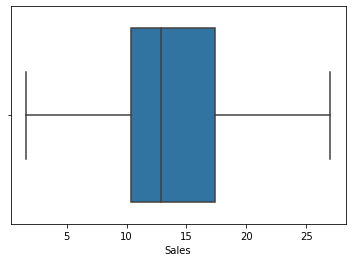

In [62]:
sns.boxplot(data['Sales']);

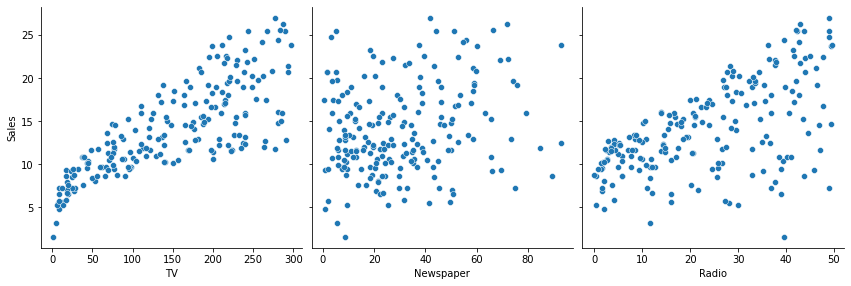

In [63]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()
     

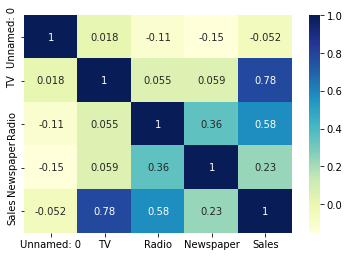

In [64]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [20]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [21]:
print(important_features)

['TV', 'Radio', 'Sales']


In [22]:
X = data['TV']
y = data['Sales']

In [23]:
X = X.values.reshape(-1,1)

In [24]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [26]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [27]:
print(X.shape,y.shape)

(200, 1) (200,)


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [29]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [30]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [31]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [32]:
knn_train_pred = knn.predict(X_train)

In [33]:
knn_test_pred = knn.predict(X_test)

In [65]:
print(knn_train_pred, knn_test_pred)

[ 6.82  7.74  9.72 21.22 17.9  19.8   7.74 19.64 10.2  10.28 13.6  19.38
 17.54 18.34 19.38 16.34  7.12 15.72 19.98 13.62 19.98 15.48 16.    7.12
 19.98 20.22  9.9  19.98 12.92 12.92 10.56 13.72 20.82  9.78 18.36 13.72
 16.26 10.36  7.74 17.54 10.76 19.24 10.28 11.8   9.84 15.54  8.2  19.24
 11.44 16.2   9.78  9.92 17.46 10.2   5.64 10.88 14.36  7.74  7.44 12.44
 17.46 19.8   6.06 10.28 12.16 11.58 10.76 10.86 18.4   7.12 11.58 11.26
 13.44 13.56 10.12 15.9  17.54 14.84 19.98 16.26 21.24 19.64 13.6  16.88
  9.84 17.74 16.84  9.66 17.54 14.76 16.2  14.36  9.58 16.84 13.4  11.58
 13.72 16.2  11.58  9.54 10.36 13.72 15.1  16.52 21.6   5.64 12.16  6.04
 13.72 20.02 12.74 19.2  21.6  11.58 21.22 18.4   5.64 20.66 20.02 10.28
  8.66 20.52 12.86 10.28 16.84 12.92 12.44  6.82 20.82 19.38 20.82 19.8
 16.26 12.92] [17.46 11.58  7.8  20.52  7.44  7.12 15.3  18.92 18.34 10.76 15.54 11.08
 15.1   7.74 19.98 15.1  13.26 14.74 11.58 16.52 19.8  17.46  5.64  7.12
 20.16 13.78 12.08 16.26 18.24 20.96 1

In [35]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [36]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)
     


R2: 0.3748541029377147
RMSE: 3.900297579944538


In [37]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.679805,0.374854,3.900298,0.304951


In [38]:
svr = SVR().fit(X_train,y_train)
svr

SVR()

In [39]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [66]:
print(svr_train_pred,svr_test_pred)

[ 7.91658105  8.18287592  9.14735095 18.92934384 18.03784261 17.67199254
  8.23334492 17.3578455   8.84086563 10.05523301 13.72733868 19.22887639
 15.46741312 17.13252483 17.06238206 15.77535838  7.98272726 16.79095728
 19.28049734 12.2634643  19.29524151 18.39048026 14.59156414  8.02016266
 19.28432304 19.31436692  9.73010263 19.23179004 13.23593278 13.24049847
 11.23316437 16.43953379 18.93113972  8.63801868 16.90348173 16.4813001
 18.15322592  8.9100108   8.17999734 15.60034363 11.24682185 19.08824676
  9.91437998 11.71263351 11.39618198 14.47019167  8.28984365 19.11186414
 11.07281315 18.51857027  8.69041473  9.30969821 18.63088376  8.83658791
  7.8342396  11.52618673 13.0548104   8.25495042  8.04029994 11.94106426
 18.63088376 17.68296015  7.86287992  9.95323691 10.92454421 10.49935278
 11.31490858 10.854497   18.75096432  8.02235393 10.59480744 11.62853704
 13.09982823 13.61270098  9.06997356 16.64229206 15.76949763 12.63395147
 19.25164403 18.07838866 19.18848851 17.39778469 13.

In [41]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5173847890757092
RMSE: 3.426948309858197


In [42]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.679805,0.374854,3.900298,0.304951
1,Support Vector Machine,0.629622,0.517385,3.426948,0.112237


In [43]:
import statsmodels.api as sm

In [44]:
X_train_constant = sm.add_constant(X_train)

In [45]:
model = sm.OLS(y_train, X_train_constant).fit()

In [46]:
model.params

const    6.942461
x1       0.048285
dtype: float64

In [67]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     235.7
Date:                Mon, 06 Feb 2023   Prob (F-statistic):           3.70e-31
Time:                        16:12:38   Log-Likelihood:                -345.72
No. Observations:                 134   AIC:                             695.4
Df Residuals:                     132   BIC:                             701.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9425      0.544     12.754      0.0

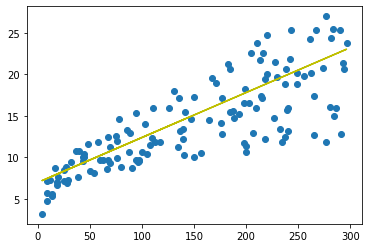

In [68]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [49]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

108   -2.274989
44     0.345596
170   -0.956690
176    1.263652
48    -3.112715
         ...   
169   -5.669764
42    -0.418811
181   -5.292640
199   -4.749310
145   -3.416786
Name: Sales, Length: 134, dtype: float64

In [50]:
y_train_pred

array([ 7.57498921,  8.15440403,  9.35668978, 18.93634816, 17.91271531,
       17.57955179,  8.2364878 , 17.3091582 ,  9.02352626, 10.27409658,
       14.17066126, 20.63596497, 15.75922356, 17.12084839, 17.0629069 ,
       16.01513177,  7.75847057, 16.84079789, 19.74752891, 12.60141278,
       19.82961268, 18.26519266, 14.99632738,  7.84538279, 19.76684274,
       20.15794774,  9.95058998, 19.55921909, 13.66367329, 13.66850174,
       11.47638234, 16.55591894, 21.25400744,  8.78693188, 16.93253857,
       16.58971813, 18.02376982,  9.10078157,  8.14957557, 15.87027806,
       11.49086771, 20.9787854 , 10.13407134, 11.99302722, 11.65020678,
       14.88527287,  8.32340002, 20.93050084, 11.30738635, 18.40521791,
        8.84970182,  9.52568577, 18.53558624,  9.01869781,  7.14042809,
       11.79023203, 13.47053501,  8.27028699,  7.8888389 , 12.24410698,
       18.53558624, 17.5892087 ,  7.36253711, 10.17269899, 11.15287573,
       10.71831461, 11.56329456, 11.08044888, 18.6852684 ,  7.85

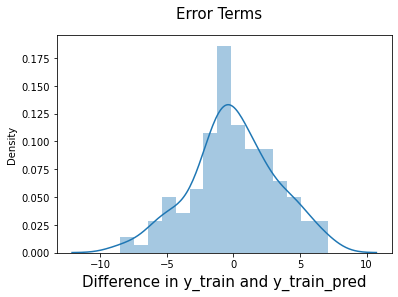

In [69]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

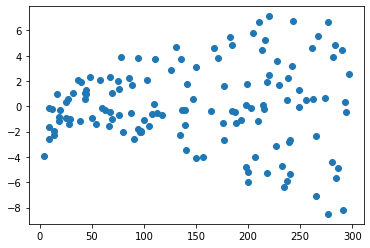

In [70]:
plt.scatter(X_train, res)
plt.show()

In [53]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [54]:
y_pred

array([18.52592933, 10.57828937,  8.09163409, 17.24638826,  7.87918199,
        7.77295594, 16.29518227, 20.82910324, 17.11601993, 11.58743685,
       14.82733139, 10.35135189, 13.30153902,  8.17854631, 19.6364744 ,
       13.19048452, 13.60090335, 12.76075186, 10.63140239, 15.27154942,
       17.5554095 , 18.52110087,  7.20319803,  7.80675514, 17.84511691,
       12.88629174, 10.54931862, 17.96582833, 17.68094938, 20.47179744,
       18.05274056, 16.16964239, 14.8369883 ,  6.97626056, 16.37726603,
       13.67815866, 19.19708483, 14.25757348, 17.4105558 ,  7.319081  ,
        7.77295594, 15.07358269, 12.24410698, 17.68094938, 15.39708929,
       16.54626202, 15.16049491, 14.93838589,  8.77727496, 11.27358715,
       15.67231133, 10.24512584, 10.63140239, 16.79734178, 12.74626649,
       17.75820469, 16.92771011,  9.65605411, 16.03927405,  7.29493871,
       10.48654869, 17.48781111, 12.5434713 , 13.84232619, 19.05705958,
       12.78489414])

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [56]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.3417538698170337

In [57]:
r2 = r2_score(y_test, y_pred)
r2

0.5410822904209037

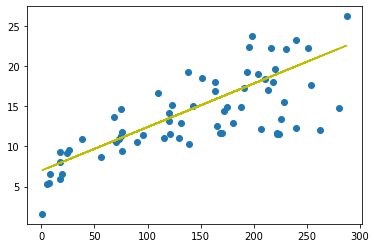

In [71]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()